In [35]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

# DADA dataset

In this notebook I will be annotating DADA dataset with rules proposed in DoTA dataset.

In [10]:
frames_path = r'../datasets\DADA\DADA2000\1\001\images'
frames_paths = list(Path(frames_path).glob('*.png'))
print(f'Amount of frames: {len(frames_paths)}')

Amount of frames: 440


### Sample image

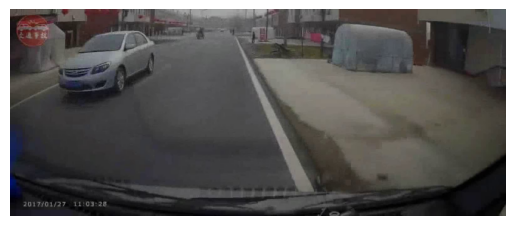

In [19]:
img = cv2.imread(frames_paths[0], cv2.IMREAD_COLOR_RGB)
_ = plt.imshow(img)
_ = plt.axis('off')

In [38]:
dataset_path = r"D:\MAGISTERKA\anomaly_traffic_road\datasets\DADA\DADA2000\images"
videos_paths = list(Path(dataset_path).iterdir())
destination_path = r"E:\videos"

fps = 30

for path in videos_paths[:1]:
    frames_paths = list(path.glob('*.png'))
    annotated_frames = []

    for i, frame_path in enumerate(frames_paths):
       img = Image.open(frame_path).convert("RGBA")
       draw = ImageDraw.Draw(img)
       
       # Dodanie numeru klatki w lewym górnym rogu
       text = f"Klatka: {i + 1}"
       draw.text((10, 10), text, font=ImageFont.truetype(font='arial', size=24), fill="white")
       
       # Zapisz zmieniony obraz w pamięci
       annotated_frames.append(np.array(img))
    
    # Stwórz wideo
    clip = ImageSequenceClip([frame for frame in annotated_frames], fps=fps)
    clip.write_videofile(f"{destination_path}/{path.name}.mp4", codec="libx264")

frame_index:  11%|█         | 38/343 [04:59<00:08, 34.41it/s, now=None]

MoviePy - Building video E:\videos/1961.mp4.
MoviePy - Writing video E:\videos/1961.mp4



frame_index:  11%|█         | 38/343 [05:07<00:08, 34.41it/s, now=None]

MoviePy - Done !
MoviePy - video ready E:\videos/1961.mp4
